# Example 1-1

In [28]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os


In [29]:
# Load the data
datasets_dir = os.path.join(os.getcwd(), "data")
life_satisfaction_data = os.path.join(datasets_dir, "lifesat")


# Organisation for Economic Co-operation and Development (OECD)
# Better Life Index (BLI)
oecd_bli_fp = os.path.join(life_satisfaction_data, "oecd_bli_2015.csv")
oecd_bli_df = pd.read_csv(filepath_or_buffer=oecd_bli_fp, thousands=',')

gdp_per_capita_fp = os.path.join(life_satisfaction_data, "gdp_per_capita.csv")
gdp_per_capita_df = pd.read_csv(filepath_or_buffer=gdp_per_capital_fp,
                                   thousands=',',
                                   sep='\t', 
                                   encoding='latin1')

# Notes:
# arg -> thousands=',': Thousands separator (could be '.' for Latin America & Europe)

In [51]:
# Prepare the Data
# Taken from https://github.com/ageron/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb

gdp_per_capita = gdp_per_capita_df.copy()
oecd_bli = oecd_bli_df.copy()

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [46]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


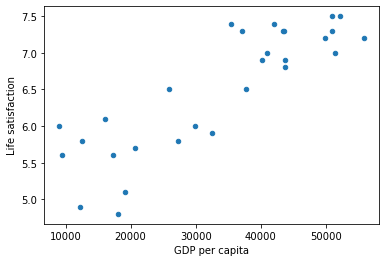

In [47]:
# Visualize the data
country_stats.plot(
    kind='scatter',
    x='GDP per capita',
    y='Life satisfaction'
)

plt.show()

In [55]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [56]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.96242338]]


In [57]:
# Try out K-Nearest Neighbords Regression Model
import sklearn.neighbors
knn_reg_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg_model.fit(x, y)
print(knn_reg_model.predict(X_new))

[[5.76666667]]
